In [1]:
import pandas as pd
from collections import Counter
import numpy as np
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Word Count Analysis:

We counted the frequency of words in the "Cleaned Review Description" column.
Removed stop words and created a word count table with the remaining words, along with their corresponding average review rating.
Generated a word cloud based on the filtered word count.
Price and Rating Data Integration:

Merged the review dataset with a second dataset containing book prices and overall ratings based on the "Book ID."
Plotted the distribution of book prices.
Correlation Analysis:

Created correlation heatmaps to visualize relationships between:
Book price and review rating.
Book price and sentiment.
Sentiment Analysis:

We converted sentiment categories into numerical values and calculated the average price per sentiment.
Created bar charts to visualize the count of specific selected words and their average ratings.
Tone Rating Estimation:

We applied tone analysis to estimate review tone ratings on a scale of 1 to 5, based on the sentiment of the review.
Compared the tone rating to the review rating and calculated a correlation (0.47).
Plotted the distribution of tone ratings.

In [2]:
data = pd.read_csv("../Data/Cleaned_Synthetic_No_Special_Characters.csv")

In [3]:
data.head()

,Book ID,Review ID,Review Title,Review Description,Review Rating,Topic of the review,Stop words extraction,Cleaned Review Description,Sentiment,Synthetic,Unnamed: 10
0,1.0,12,Some of the figures and illustrations are defi...,Some of the figures and illustrations are defi...,2,NaN,NaN,some of the figures and illustrations are defi...,negative,real,NaN
1,3.0,48,NaN,"My book came wet and ripped, looks like it was...",1,NaN,NaN,my book came wet and ripped looks like it was ...,negative,real,NaN
2,3.0,49,NaN,Only giving 1 star because all the pages are s...,1,NaN,NaN,only giving 1 star because all the pages are s...,negative,real,NaN
3,4.0,54,NaN,If I could give it half a star I would. The bo...,,NaN,NaN,if i could give it half a star i would the boo...,negative,real,NaN
4,4.0,64,NaN,"f you want to study anatomy in the ""real"" sens...",NaN,NaN,NaN,f you want to study anatomy in the real sense ...,negative,real,NaN


In [22]:
shape = data.shape
shape

(1235, 11)

In [4]:
# Extract the relevant columns for analysis
review_column = "Cleaned Review Description"
rating_column = "Review Rating"

# Clean the rating column to ensure it's numerical
data[rating_column] = pd.to_numeric(data[rating_column], errors='coerce')

# Tokenizing and counting word frequencies
word_counter = Counter()
word_ratings = {}

for _, row in data.iterrows():
    if pd.notnull(row[review_column]):
        words = row[review_column].split()
        rating = row[rating_column]
        
        for word in words:
            word_counter[word] += 1
            
            if word in word_ratings:
                word_ratings[word].append(rating)
            else:
                word_ratings[word] = [rating]

# Calculate the average rating for each word
word_avg_ratings = {word: np.nanmean(ratings) for word, ratings in word_ratings.items()}

# Create a DataFrame from the word counts and average ratings
word_count_df = pd.DataFrame({
    'word': list(word_counter.keys()),
    'count': list(word_counter.values()),
    'average_rating': [word_avg_ratings[word] for word in word_counter.keys()]
})

# Rank by count and display the top results
word_count_df = word_count_df.sort_values(by='count', ascending=False).reset_index(drop=True)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Word Count and Average Rating", dataframe=word_count_df)


/var/folders/44/ly8mmy9x11lbs46phpm673mr0000gn/T/ipykernel_72918/3050352351.py:26: RuntimeWarning: Mean of empty slice
  word_avg_ratings = {word: np.nanmean(ratings) for word, ratings in word_ratings.items()}


In [5]:
# Extract the relevant columns for analysis
review_column = "Cleaned Review Description"
rating_column = "Review Rating"

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the "Cleaned Review Description" column and reprocess the word count
word_counter_filtered = Counter()
word_ratings_filtered = {}

for _, row in data.iterrows():
    if pd.notnull(row[review_column]):
        words = row[review_column].split()
        filtered_words = [word for word in words if word.lower() not in stop_words]
        rating = row[rating_column]
        
        for word in filtered_words:
            word_counter_filtered[word] += 1
            
            if word in word_ratings_filtered:
                word_ratings_filtered[word].append(rating)
            else:
                word_ratings_filtered[word] = [rating]

# Calculate the average rating for each filtered word
word_avg_ratings_filtered = {word: np.nanmean(ratings) for word, ratings in word_ratings_filtered.items()}

# Create a DataFrame from the filtered word counts and average ratings
word_count_filtered_df = pd.DataFrame({
    'word': list(word_counter_filtered.keys()),
    'count': list(word_counter_filtered.values()),
    'average_rating': [word_avg_ratings_filtered[word] for word in word_counter_filtered.keys()]
})

# Rank by count and display the top results
word_count_filtered_df = word_count_filtered_df.sort_values(by='count', ascending=False).reset_index(drop=True)

#tools.display_dataframe_to_user(name="Word Count and Average Rating (Stopwords Removed)", dataframe=word_count_filtered_df)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/austinchang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/44/ly8mmy9x11lbs46phpm673mr0000gn/T/ipykernel_72918/1760477918.py:30: RuntimeWarning: Mean of empty slice
  word_avg_ratings_filtered = {word: np.nanmean(ratings) for word, ratings in word_ratings_filtered.items()}


In [6]:
word_count_filtered_df

,word,count,average_rating
0,book,1307,4.286957
1,dental,485,4.887640
2,read,332,4.721088
3,great,296,4.711628
4,practice,228,4.894737
...,...,...,...
4377,visiting,1,NaN
4378,society,1,NaN
4379,historical,1,NaN
4380,curator,1,NaN


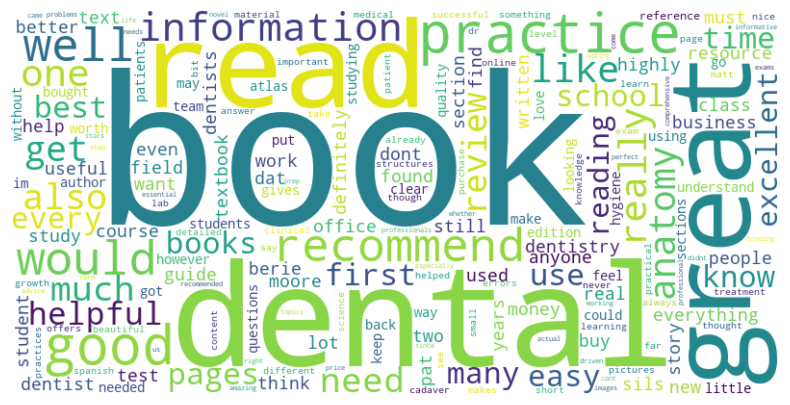

In [7]:


# Generate a word cloud based on the word count from the filtered data
wordcloud_data = {word: count for word, count in zip(word_count_filtered_df['word'], word_count_filtered_df['count'])}

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


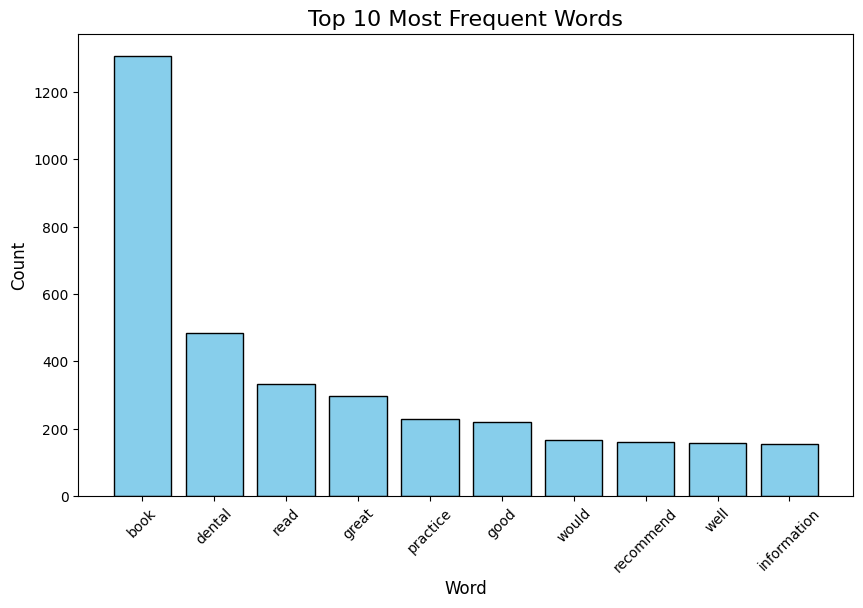

In [8]:
# Select the top 10 most frequent words
top_10_words = word_count_filtered_df.head(10)

# Plot a bar chart of word vs count for the top 10 most frequent words
plt.figure(figsize=(10, 6))
plt.bar(top_10_words['word'], top_10_words['count'], color='skyblue', edgecolor='black')
plt.title('Top 10 Most Frequent Words', fontsize=16)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


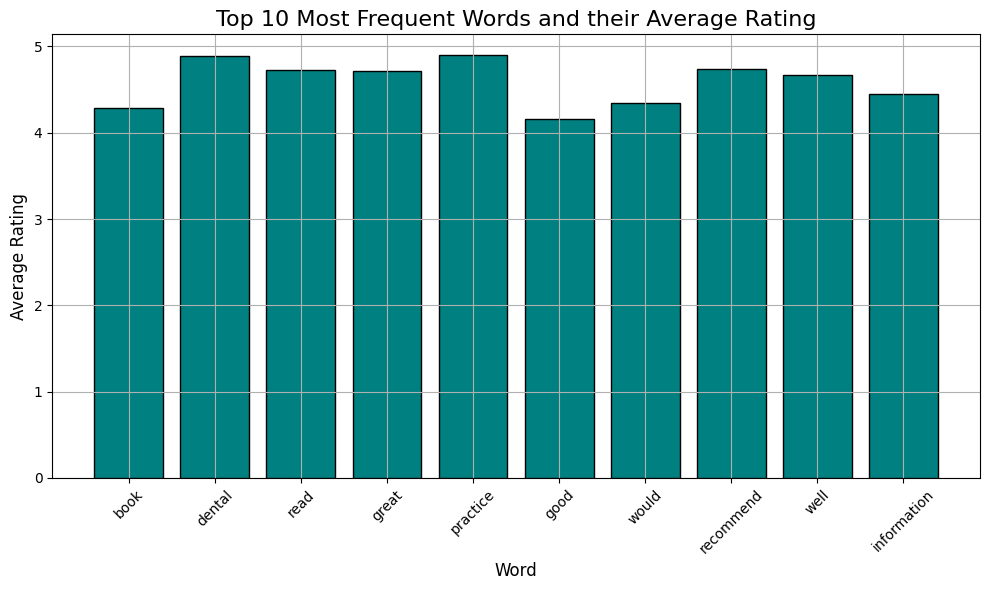

In [9]:
# Select the top 10 most frequent words from the word_count_filtered_df
top_10_words = word_count_filtered_df.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_words['word'], top_10_words['average_rating'], color='teal', edgecolor='black')
plt.title('Top 10 Most Frequent Words and their Average Rating', fontsize=16)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [10]:
# Define the list of words to search for in the word_count_filtered_df
search_words = ['time efficient', 'effective', 'e-learning', 'concepts', 'efficiency', 'excellent', 'simple', 'user friendly']

# Filter the word_count_filtered_df to find the rows that contain the words from the search list
filtered_word_counts = word_count_filtered_df[word_count_filtered_df['word'].isin(search_words)]

filtered_word_counts

,word,count,average_rating
32,excellent,79,4.829787
290,simple,20,5.000000
506,effective,12,5.000000
635,concepts,10,5.000000
955,efficiency,6,5.000000


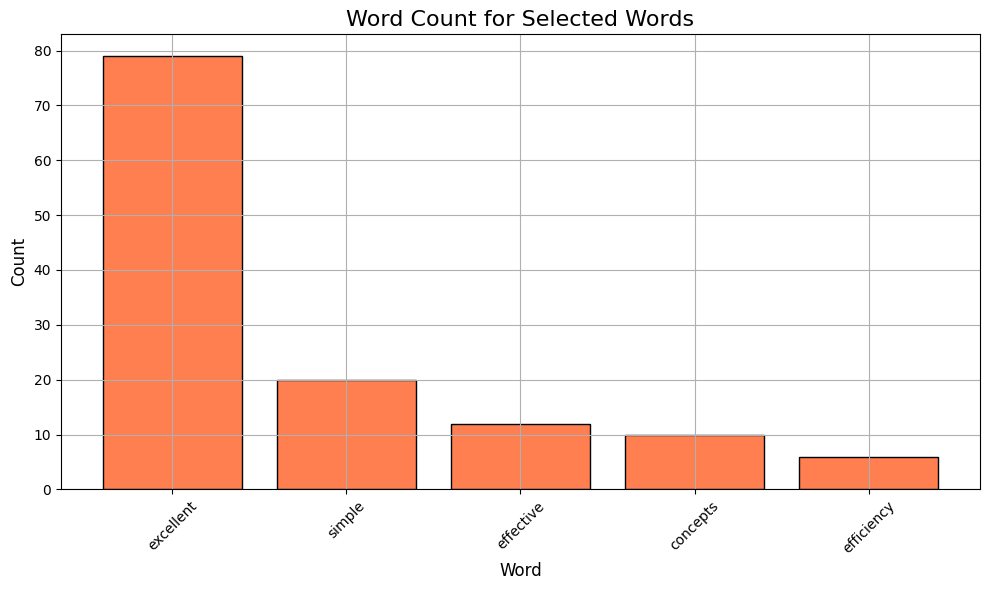

In [11]:
# Plot the bar chart for the selected words and their counts
plt.figure(figsize=(10, 6))
plt.bar(filtered_word_counts['word'], filtered_word_counts['count'], color='coral', edgecolor='black')
plt.title('Word Count for Selected Words', fontsize=16)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
book_data = pd.read_csv("../Data/book table.csv")

In [13]:
# Select the relevant columns from the book data
book_data_filtered = book_data[['Book ID', 'Price', 'Overall Rating']]

# Merge the two datasets based on the 'Book ID'
merged_data = pd.merge(data, book_data_filtered, on='Book ID', how='left')

In [14]:
merged_data.head()

,Book ID,Review ID,Review Title,Review Description,Review Rating,Topic of the review,Stop words extraction,Cleaned Review Description,Sentiment,Synthetic,Unnamed: 10,Price,Overall Rating
0,1.0,12,Some of the figures and illustrations are defi...,Some of the figures and illustrations are defi...,2.0,NaN,NaN,some of the figures and illustrations are defi...,negative,real,NaN,$222.30,NaN
1,3.0,48,NaN,"My book came wet and ripped, looks like it was...",1.0,NaN,NaN,my book came wet and ripped looks like it was ...,negative,real,NaN,$340.90,4.6
2,3.0,49,NaN,Only giving 1 star because all the pages are s...,1.0,NaN,NaN,only giving 1 star because all the pages are s...,negative,real,NaN,$340.90,4.6
3,4.0,54,NaN,If I could give it half a star I would. The bo...,NaN,NaN,NaN,if i could give it half a star i would the boo...,negative,real,NaN,$228.53,4.5
4,4.0,64,NaN,"f you want to study anatomy in the ""real"" sens...",NaN,NaN,NaN,f you want to study anatomy in the real sense ...,negative,real,NaN,$228.53,4.5


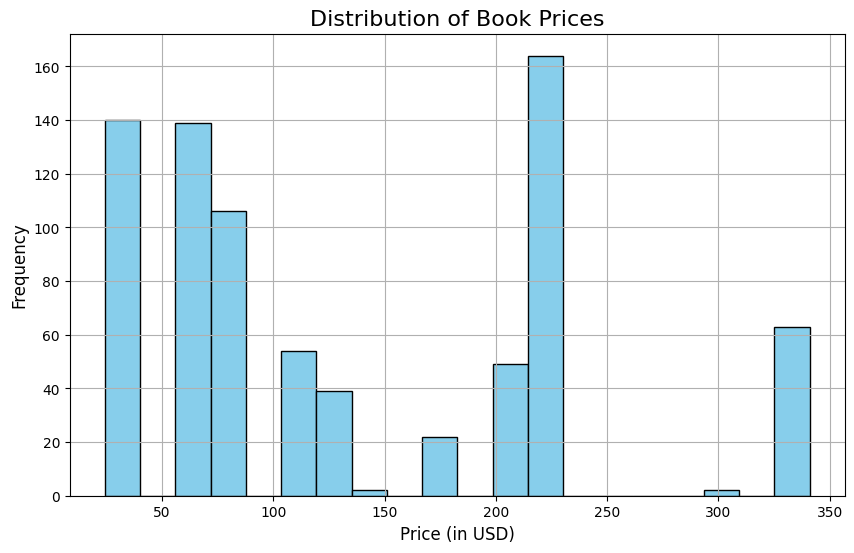

In [15]:
# Remove the dollar sign and convert the 'Price' column to a numeric type for analysis
merged_data['Price_numeric'] = merged_data['Price'].replace('[\$,]', '', regex=True).astype(float)

# Plot the distribution of the book prices
plt.figure(figsize=(10, 6))
plt.hist(merged_data['Price_numeric'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Book Prices', fontsize=16)
plt.xlabel('Price (in USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


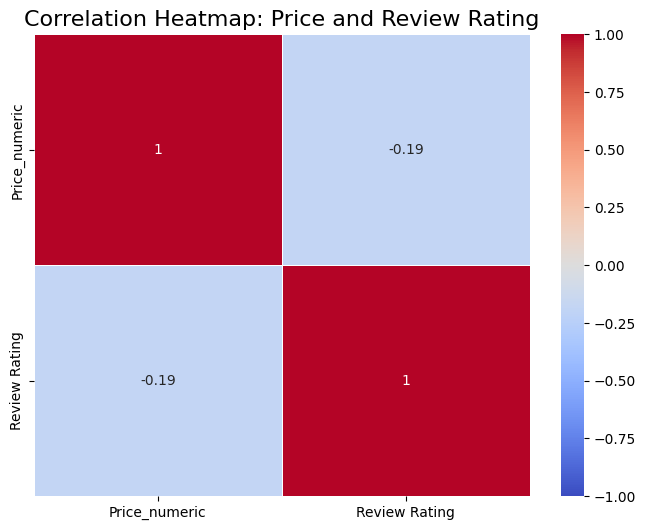

In [16]:
import seaborn as sns

# Select relevant columns and drop missing values
correlation_data = merged_data[['Price_numeric', 'Review Rating']].dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap: Price and Review Rating', fontsize=16)
plt.show()


In [17]:
# Group by sentiment and calculate the average price for each sentiment category
average_price_per_sentiment = merged_data.groupby('Sentiment')['Price_numeric'].mean().reset_index()

# Rename the columns for clarity
average_price_per_sentiment.columns = ['Sentiment', 'Average Price']

average_price_per_sentiment

,Sentiment,Average Price
0,negative,159.632548
1,neutral,168.985455
2,positive,127.578885


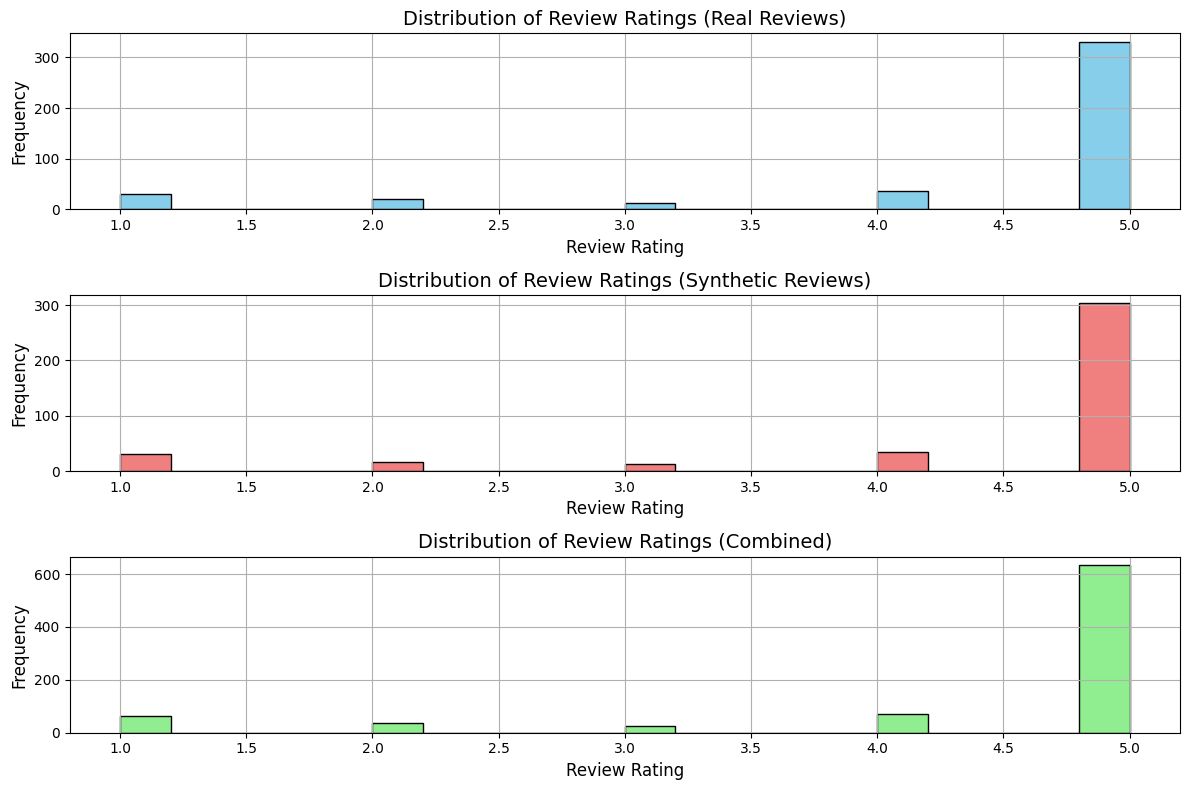

In [18]:
# Prepare data for the three different groups: real, synthetic, and combined
real_reviews = merged_data[merged_data['Synthetic'] == 'real']
synthetic_reviews = merged_data[merged_data['Synthetic'] == 'synthetic']
combined_reviews = merged_data

# Plot distribution of ratings for real reviews
plt.figure(figsize=(12, 8))

# Subplot for real reviews
plt.subplot(3, 1, 1)
plt.hist(real_reviews['Review Rating'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Ratings (Real Reviews)', fontsize=14)
plt.xlabel('Review Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# Subplot for synthetic reviews
plt.subplot(3, 1, 2)
plt.hist(synthetic_reviews['Review Rating'].dropna(), bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Review Ratings (Synthetic Reviews)', fontsize=14)
plt.xlabel('Review Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# Subplot for combined reviews
plt.subplot(3, 1, 3)
plt.hist(combined_reviews['Review Rating'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Review Ratings (Combined)', fontsize=14)
plt.xlabel('Review Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [19]:
from textblob import TextBlob

# Function to estimate a tone rating based on sentiment polarity
def estimate_tone_rating(review_text):
    blob = TextBlob(review_text)
    polarity = blob.sentiment.polarity
    
    # Mapping polarity to a 1-5 scale
    if polarity <= -0.6:
        return 1  # Strongly negative
    elif -0.6 < polarity <= -0.2:
        return 2  # Moderately negative
    elif -0.2 < polarity <= 0.2:
        return 3  # Neutral
    elif 0.2 < polarity <= 0.6:
        return 4  # Moderately positive
    else:
        return 5  # Strongly positive

# Apply the tone rating estimation to the 'Cleaned Review Description' column
merged_data['Tone Rating'] = merged_data[review_column].apply(lambda x: estimate_tone_rating(x) if pd.notnull(x) else None)

merged_data.head()

,Book ID,Review ID,Review Title,Review Description,Review Rating,Topic of the review,Stop words extraction,Cleaned Review Description,Sentiment,Synthetic,Unnamed: 10,Price,Overall Rating,Price_numeric,Tone Rating
0,1.0,12,Some of the figures and illustrations are defi...,Some of the figures and illustrations are defi...,2.0,NaN,NaN,some of the figures and illustrations are defi...,negative,real,NaN,$222.30,NaN,222.30,2
1,3.0,48,NaN,"My book came wet and ripped, looks like it was...",1.0,NaN,NaN,my book came wet and ripped looks like it was ...,negative,real,NaN,$340.90,4.6,340.90,3
2,3.0,49,NaN,Only giving 1 star because all the pages are s...,1.0,NaN,NaN,only giving 1 star because all the pages are s...,negative,real,NaN,$340.90,4.6,340.90,3
3,4.0,54,NaN,If I could give it half a star I would. The bo...,NaN,NaN,NaN,if i could give it half a star i would the boo...,negative,real,NaN,$228.53,4.5,228.53,3
4,4.0,64,NaN,"f you want to study anatomy in the ""real"" sens...",NaN,NaN,NaN,f you want to study anatomy in the real sense ...,negative,real,NaN,$228.53,4.5,228.53,3


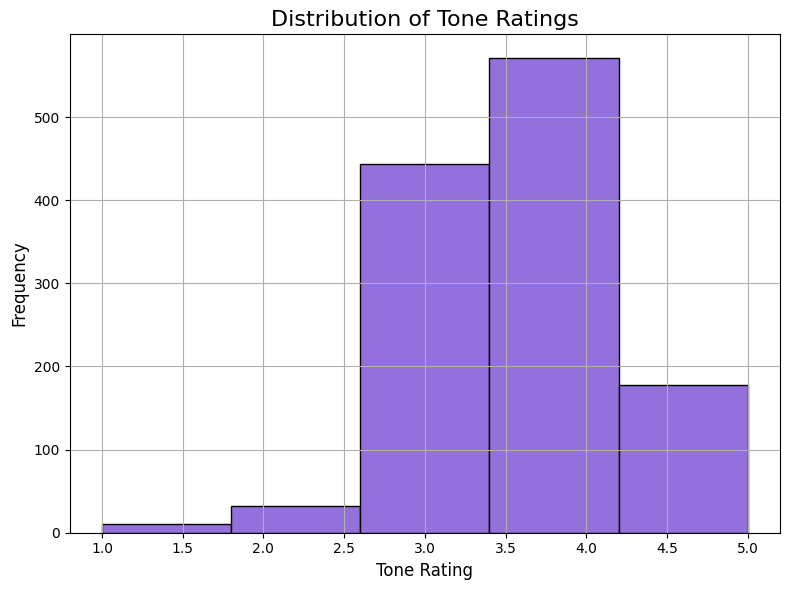

In [20]:
# Plot the distribution of tone ratings
plt.figure(figsize=(8, 6))
plt.hist(merged_data['Tone Rating'].dropna(), bins=5, color='mediumpurple', edgecolor='black')
plt.title('Distribution of Tone Ratings', fontsize=16)
plt.xlabel('Tone Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [24]:
# Calculate mean, median, and mode for Price, Review Rating, and Tone Rating
price_stats = {
    'mean': merged_data['Price_numeric'].mean(),
    'median': merged_data['Price_numeric'].median(),
    'mode': merged_data['Price_numeric'].mode()[0] if not merged_data['Price_numeric'].mode().empty else None
}

review_rating_stats = {
    'mean': merged_data['Review Rating'].mean(),
    'median': merged_data['Review Rating'].median(),
    'mode': merged_data['Review Rating'].mode()[0] if not merged_data['Review Rating'].mode().empty else None
}

tone_rating_stats = {
    'mean': merged_data['Tone Rating'].mean(),
    'median': merged_data['Tone Rating'].median(),
    'mode': merged_data['Tone Rating'].mode()[0] if not merged_data['Tone Rating'].mode().empty else None
}

# Combine results into a dataframe for display
stats_table = pd.DataFrame({
    'Metric': ['Price', 'Review Rating', 'Tone Rating'],
    'Mean': [price_stats['mean'], review_rating_stats['mean'], tone_rating_stats['mean']],
    'Median': [price_stats['median'], review_rating_stats['median'], tone_rating_stats['median']],
    'Mode': [price_stats['mode'], review_rating_stats['mode'], tone_rating_stats['mode']]
})

stats_table

,Metric,Mean,Median,Mode
0,Price,135.198590,105.24,228.53
1,Review Rating,4.422705,5.00,5.00
2,Tone Rating,3.708502,4.00,4.00
